# Estimating *$\pi$* using the Monte Carlo Method

-------------------
| Explanation |    |
|:-----------|:-------:|
|Assume we have a circle of radius *r*. This circle can be inscribed inside a square of width *2r*. Pi can then be estimated by randomly selecting an *x* and *y* point inside the square and looking at the number of points that land inside and outside the circle <br><br> $Area_c = \pi r^2$ <br> $Area_s = (2r)^2 = 4r^2$ <br> $\frac{Area_c}{Area_s} = \frac{\pi r^2}{4r^2} = \frac{\pi}{4}$ <br> $\pi ≈ \frac{4 Area_c}{Area_s}$ <br><br> This means that computing the ratio of the areas and multiplying by 4 should approximate $\pi$|<img src="https://www.101computing.net/wp/wp-content/uploads/estimating-pi-monte-carlo-method.png" alt="pi_monte_carlo" style="width: 500px;"/>|
Can also think of as shown below:
<img src="https://d138zd1ktt9iqe.cloudfront.net/media/seo_landing_files/derivation-of-area-of-a-circle-2-1615860096.png" alt="pi_derivation" style="width: 500px;"/>

In [4]:
import random
import math
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import IntProgress
from IPython.display import display
%matplotlib notebook

<IPython.core.display.Javascript object>


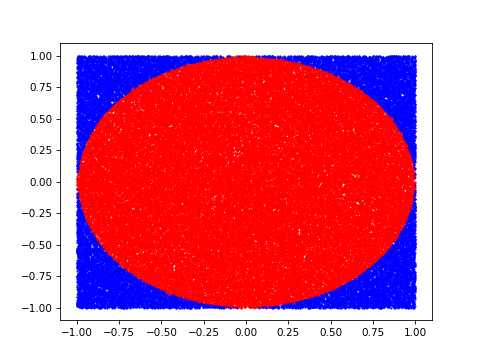

Points inside circle: 78264
Points outside circle: 21736
Estimate for Pi: 3.13056


In [6]:
NUMBER_OF_SAMPLES = 10**5
TIMES_TO_REDRAW_PLOT = 50

_REDRAW_EVERY_X = NUMBER_OF_SAMPLES/TIMES_TO_REDRAW_PLOT

inside_circle, outside_circle = [], []  # list of x,y points
fig, ax = plt.subplots()

def plot_animate():
    has_enough_points = len(inside_circle) > 0 and len(outside_circle) > 0
    if has_enough_points:
        # only try to plot if we have enouguh items in our list
        ax.clear()
        
        _inside_x, _inside_y = zip(*inside_circle)
        _outside_x, _outside_y = zip(*outside_circle)
        ax.plot(_inside_x, _inside_y, marker='o', markersize=1, color='r',linestyle = 'None')
        ax.plot(_outside_x, _outside_y, marker='o', markersize=1, color='b',linestyle = 'None')

        fig.canvas.draw()

# Will loop through randomly genarated x and y points centered at zero ranging from -1 to 1. 
# Distance will be calculated and x and y points added to a list for plotting
for i in range(NUMBER_OF_SAMPLES):
    x = -1 + 2*random.random()
    y = -1 + 2*random.random()
    r = math.sqrt(x**2 + y**2)
    # NOTE: numpy append() and concatenate() use append(). Untested
    inside_circle.append([x,y]) if (r<1) else outside_circle.append([x,y])
    if not (i % _REDRAW_EVERY_X): plot_animate()
    
    
# Count number of points inside circle and outside circle (but inside square)
_inside, _outside = len(inside_circle), len(outside_circle)
print("Points inside circle: {}".format(_inside))   
print("Points outside circle: {}".format(_outside))
print("Estimate for Pi: {}".format(4*_inside/(_inside+_outside)))

### Calculate how good the approximation gets as the number of samples increases

IntProgress(value=1, max=1000, min=1)

Simulating 1000 tries...


<IPython.core.display.Javascript object>


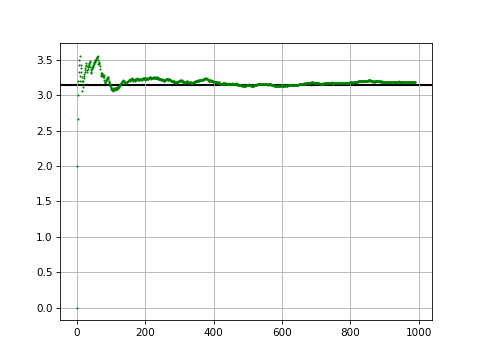

Last estimate is: 3.195195195195195


In [14]:
NUMBER_OF_SAMPLES = 10**3
TIMES_TO_REDRAW_PLOT = 100

_REDRAW_EVERY_X = NUMBER_OF_SAMPLES/TIMES_TO_REDRAW_PLOT

pi_estimate = []  # list of estimate at each sample point

f = IntProgress(min=1, max=NUMBER_OF_SAMPLES)
display(f)
print(f"Simulating {NUMBER_OF_SAMPLES} tries...")

fig, ax = plt.subplots()

def plot_estimate():
    ax.clear()
    ax.grid(True)
    ax.plot(pi_estimate, marker='o', markersize=1, color='g',linestyle = 'None')
    ax.axhline(y=3.1415, xmin=0, xmax=3, c="black", linewidth=2, zorder=0)
    
    fig.canvas.draw()

inside_cnt, outside_cnt = 0, 0  # global count of points
_estimate = 0

for i in range(1, NUMBER_OF_SAMPLES):
    f.value += 1
#     for j in range(i):
    x = -1 + 2*random.random()
    y = -1 + 2*random.random()
    if math.sqrt(x**2 + y**2) < 1:
        inside_cnt += 1
    else:
        outside_cnt+= 1
    _estimate = 4*inside_cnt/(inside_cnt+outside_cnt)
    pi_estimate += _estimate,  # NOTE: apparently adding tuples to a list is faster
    if not (i % _REDRAW_EVERY_X): plot_estimate()

print(f"Last estimate is: {_estimate}")